In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time
import os
from os import listdir
from sklearn.model_selection import train_test_split
from glob import glob
from sklearn import preprocessing
from PIL import Image, ImageOps, ImageEnhance
import cv2


In [45]:
# Définir le chemin vers les données
path = 'images/'
# Charger et prétraiter les images

list_labels = ["boxer", "Chihuahua", "Eskimo_dog"]
label_no_name = "no_name"

def photo_class(photo) :
    for label in list_labels :
        if label in photo : 
            return label
    return label_no_name
    
data_path = glob(path+'**/*.jp*', recursive=True)

def data_fct(path) :
    list_photos = [file for file in path]
    print(len(list_photos))
    data = pd.DataFrame()
    data["image_path"] = list_photos
    data["label_name"] = data["image_path"].apply(lambda x : photo_class(x))
    return data

data = data_fct(data_path)
data, data_test = train_test_split(data, test_size=0.2, random_state=42)
le = preprocessing.LabelEncoder()
le.fit(data["label_name"])
data["label"] = le.transform(data["label_name"])
data = data.reset_index(drop=True)
data_test["label"] = le.transform(data_test["label_name"])
data_test = data_test.reset_index(drop=True)
display(data)
data_test.head(5)



453


,image_path,label_name,label
0,images/n02109961-Eskimo_dog/n02109961_3992.jpg,Eskimo_dog,1
1,images/n02109961-Eskimo_dog/n02109961_4182.jpg,Eskimo_dog,1
2,images/n02109961-Eskimo_dog/n02109961_15315.jpg,Eskimo_dog,1
3,images/n02108089-boxer/n02108089_1104.jpg,boxer,2
4,images/n02108089-boxer/n02108089_9778.jpg,boxer,2
...,...,...,...
357,images/n02109961-Eskimo_dog/n02109961_10660.jpg,Eskimo_dog,1
358,images/n02085620-Chihuahua/n02085620_242.jpg,Chihuahua,0
359,images/n02108089-boxer/n02108089_125.jpg,boxer,2
360,images/n02108089-boxer/n02108089_3899.jpg,boxer,2


,image_path,label_name,label
0,images/n02108089-boxer/n02108089_2653.jpg,boxer,2
1,images/n02109961-Eskimo_dog/n02109961_6778.jpg,Eskimo_dog,1
2,images/n02108089-boxer/n02108089_485.jpg,boxer,2
3,images/n02108089-boxer/n02108089_3028.jpg,boxer,2
4,images/n02085620-Chihuahua/n02085620_1916.jpg,Chihuahua,0


## Cropping.  
Le cropping dans le prétraitement d'images consiste à découper une partie spécifique d'une image pour se concentrer sur une région d'intérêt ou supprimer des éléments indésirables.


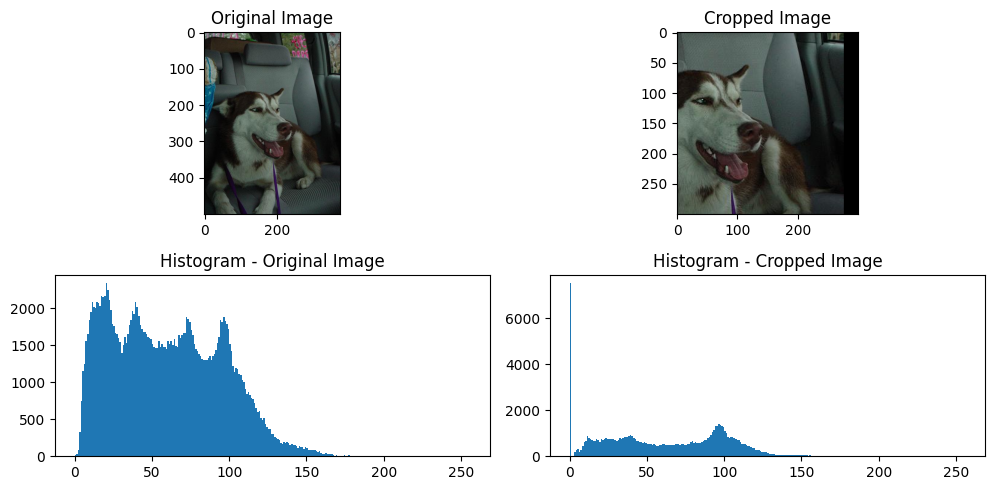

In [46]:
image_file = data["image_path"].iloc[2]
image = Image.open(image_file)

# Convert the image to grayscale for histogram plotting
gray_image = image.convert('L')

# Convert PIL Image to NumPy array for histogram plotting
gray_array = np.array(gray_image)

# Display the original image and its histogram
plt.figure(figsize=(15, 5))
plt.subplot(2, 3, 1)  # 2 rows, 3 columns, 1st subplot
plt.imshow(image)
plt.title('Original Image')
plt.subplot(2, 3, 4)  # 2 rows, 3 columns, 4th subplot (below the 1st)
plt.hist(gray_array.ravel(), bins=256, range=[0,256])
plt.title('Histogram - Original Image')

# Define the cropping area (left, upper, right, lower)
crop_area = (100, 100, 400, 400)  # Example crop area
cropped_image = image.crop(crop_area)

# Convert the cropped image to grayscale for histogram plotting
cropped_gray_image = cropped_image.convert('L')

# Convert PIL Image to NumPy array for histogram plotting
cropped_gray_image  = np.array(cropped_gray_image)

# Display the cropped image and its histogram
plt.subplot(2, 3, 2)  # 2 rows, 3 columns, 2nd subplot
plt.imshow(cropped_image)
plt.title('Cropped Image')
plt.subplot(2, 3, 5)  # 2 rows, 3 columns, 5th subplot (below the 2nd)
plt.hist(cropped_gray_image.ravel(), bins=256, range=[0,256])
plt.title('Histogram - Cropped Image')

plt.tight_layout()
plt.show()

## Mirroring.  
Le mirroring dans le prétraitement d'images consiste à créer une image miroir en inversant l'image original horizontalement ou verticalement pour augmenter les données et améliorer la robustesse des modèles.


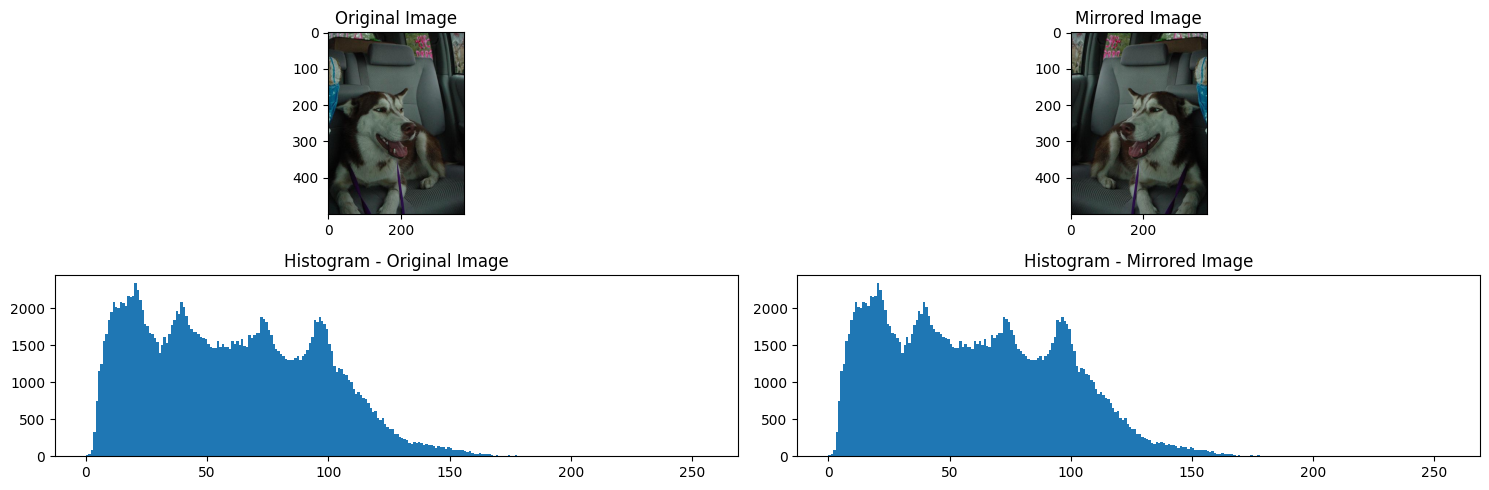

In [47]:
# Mirror (flip) the image horizontally
mirrored_image = ImageOps.mirror(image)

# Convert the original and mirrored images to grayscale
gray_image = image.convert('L')
mirrored_gray_image = mirrored_image.convert('L')

# Convert the grayscale images to NumPy arrays and flatten them
gray_array = np.array(gray_image).flatten()
mirrored_gray_array = np.array(mirrored_gray_image).flatten()

# Display the original image and its histogram
plt.figure(figsize=(15, 5))
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, 1st subplot
plt.imshow(image)
plt.title('Original Image')
plt.subplot(2, 2, 3)  # 2 rows, 2 columns, 3rd subplot (below the 1st)
plt.hist(gray_array, bins=256, range=[0,256])
plt.title('Histogram - Original Image')

# Display the mirrored image and its histogram
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, 2nd subplot
plt.imshow(mirrored_image)
plt.title('Mirrored Image')
plt.subplot(2, 2, 4)  # 2 rows, 2 columns, 4th subplot (below the 2nd)
plt.hist(mirrored_gray_array, bins=256, range=[0,256])
plt.title('Histogram - Mirrored Image')

plt.tight_layout()
plt.show()

## Whitening

Le whitening dans le prétraitement d'images consiste à normaliser les valeurs des pixels pour avoir une moyenne de zéro et une variance unitaire, réduisant ainsi les redondances et améliorant les performances des algorithmes d'apprentissage.

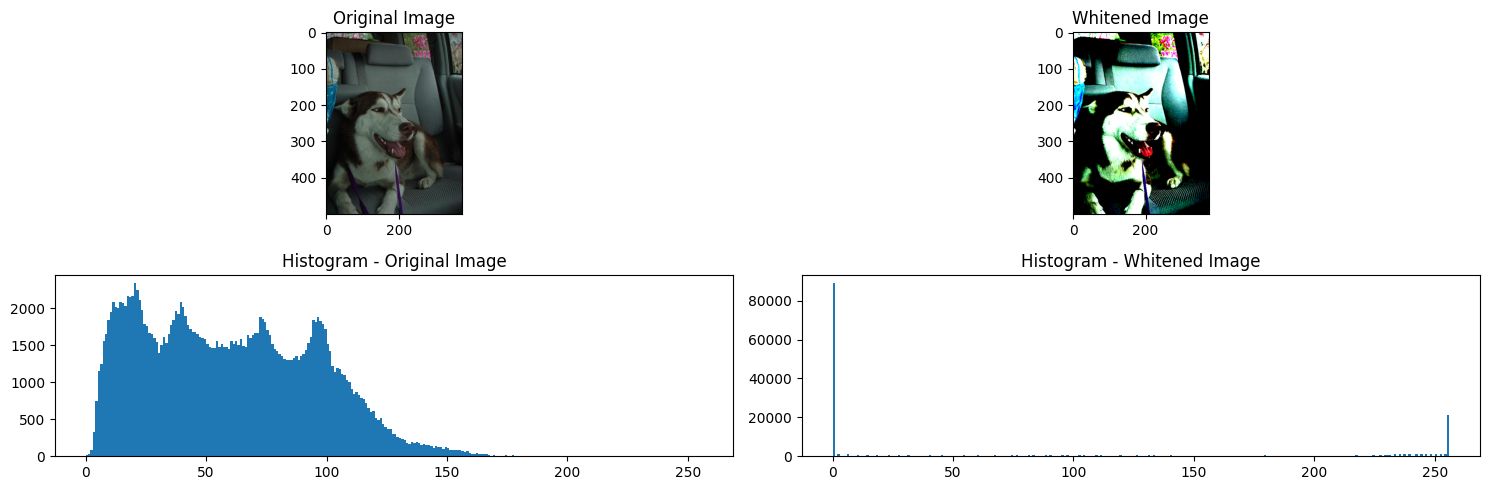

In [48]:
# Assuming 'image' is your PIL Image object
image_array = np.array(image)

# Whitening transformation
# Compute the mean and std deviation of the pixel values
mean = np.mean(image_array)
std = np.std(image_array)

# Apply whitening
whitened_image_array = (image_array - mean) / std

# Convert the whitened numpy array back to a PIL image
whitened_image = Image.fromarray(np.uint8(whitened_image_array.clip(0, 1) * 255))

# Convert images to grayscale for histogram plotting
gray_image = image.convert('L')
whitened_gray_image = whitened_image.convert('L')

# Flatten the images for histogram plotting
gray_array = np.array(gray_image).flatten()
whitened_gray_array = np.array(whitened_gray_image).flatten()

# Display the original image and its histogram
plt.figure(figsize=(15, 5))
plt.subplot(2, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.subplot(2, 2, 3)
plt.hist(gray_array, bins=256, range=[0,256])
plt.title('Histogram - Original Image')

# Display the whitened image and its histogram
plt.subplot(2, 2, 2)
plt.imshow(whitened_image)
plt.title('Whitened Image')
plt.subplot(2, 2, 4)
plt.hist(whitened_gray_array, bins=256, range=[0,256])
plt.title('Histogram - Whitened Image')

plt.tight_layout()
plt.show()

## Contrast

Le contraste dans le prétraitement d'images consiste à ajuster la différence entre les zones claires et sombres d'une image pour améliorer la visibilité des détails.

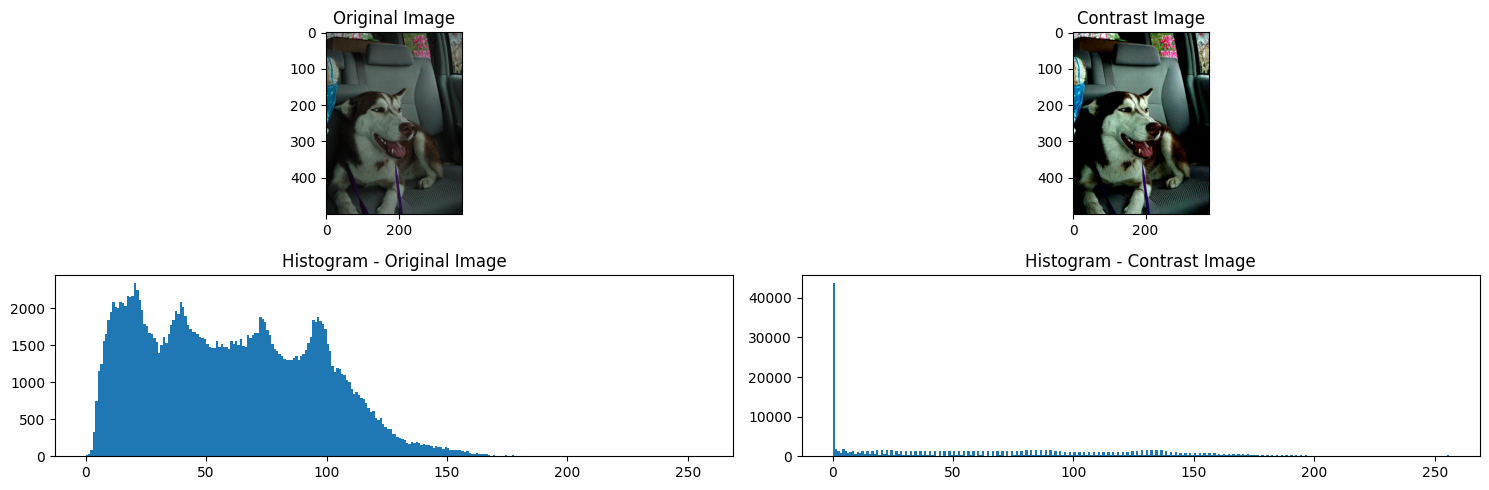

In [49]:
contrast_enhancer = ImageEnhance.Contrast(image)
contrast_image = contrast_enhancer.enhance(2.0)  # Increase contrast

# Convert images to grayscale for histogram plotting
gray_image = image.convert('L')
contrast_gray_image = contrast_image.convert('L')

# Flatten the images for histogram plotting
gray_array = np.array(gray_image).flatten()
contrast_gray_array = np.array(contrast_gray_image).flatten()

# Display the original image and its histogram
plt.figure(figsize=(15, 5))
plt.subplot(2, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.subplot(2, 2, 3)
plt.hist(gray_array, bins=256, range=[0,256])
plt.title('Histogram - Original Image')

# Display the contrast-adjusted image and its histogram
plt.subplot(2, 2, 2)
plt.imshow(contrast_image)
plt.title('Contrast Image')
plt.subplot(2, 2, 4)
plt.hist(contrast_gray_array, bins=256, range=[0,256])
plt.title('Histogram - Contrast Image')

plt.tight_layout()
plt.show()

## equalization

L'equalization dans le prétraitement d'images consiste à redistribuer les niveaux de gris pour uniformiser l'histogramme et améliorer le contraste de l'image.

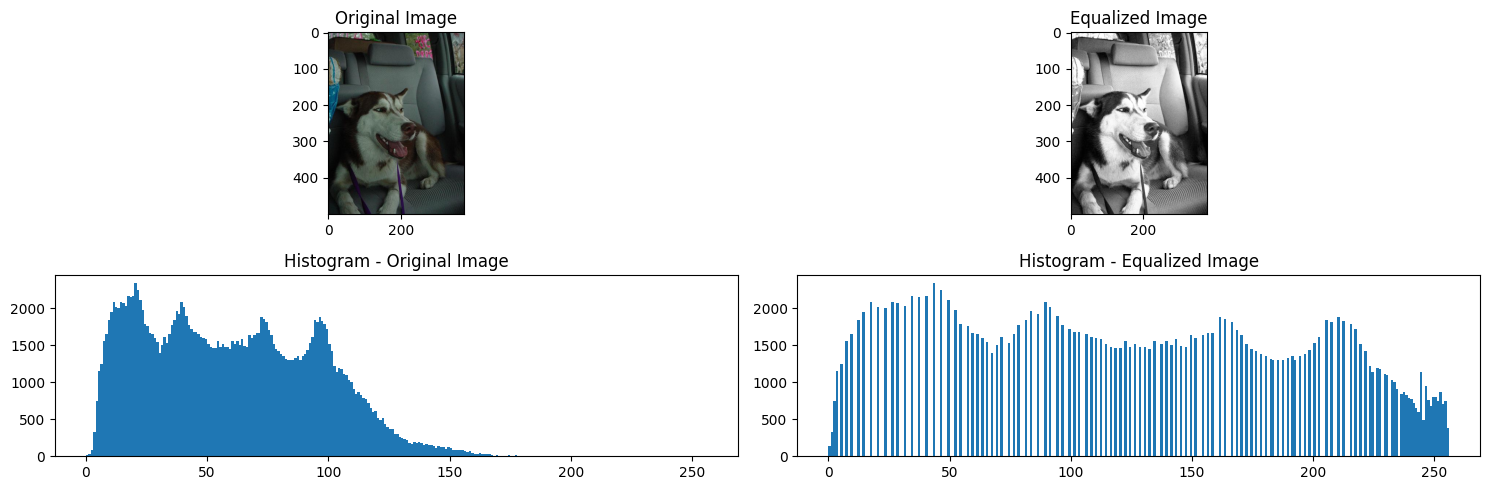

In [50]:
import cv2
# Convert the image to grayscale for equalization
gray_image = image.convert('L')

# Convert the grayscale image to a numpy array for OpenCV processing
gray_array = np.array(gray_image)

# Apply histogram equalization
equalized_array = cv2.equalizeHist(gray_array)

# Convert the equalized array back to a PIL image
equalized_image = Image.fromarray(equalized_array)

# Flatten the images for histogram plotting
original_gray_array = np.array(gray_image).flatten()
equalized_gray_array = equalized_array.flatten()

# Display the original image and its histogram
plt.figure(figsize=(15, 5))
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(2, 2, 3)
plt.hist(original_gray_array, bins=256, range=[0,256])
plt.title('Histogram - Original Image')

# Display the histogram-equalized image and its histogram
plt.subplot(2, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.subplot(2, 2, 4)
plt.hist(equalized_gray_array, bins=256, range=[0,256])
plt.title('Histogram - Equalized Image')

plt.tight_layout()
plt.show()